In [1]:
%load_ext autoreload
%autoreload 2
import datajoint as dj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pipeline.ingest import behavior as behavior_ingest
from pipeline.ingest import ephys as ephys_ingest
from pipeline import lab, get_schema_name, experiment, foraging_analysis, report, ephys, histology, psth_foraging, ccf
import pipeline.shell as shell
from pipeline import psth_foraging
from pipeline.plot import unit_psth

shell.logsetup('INFO')
[hh for hh in dj.list_schemas() if 'hanhou' in hh]

Connecting hanhou@datajoint.mesoscale-activity-map.org:3306


['hanhou_foraging_ccf',
 'hanhou_foraging_ephys',
 'hanhou_foraging_experiment',
 'hanhou_foraging_foraging_analysis',
 'hanhou_foraging_foraging_model',
 'hanhou_foraging_histology',
 'hanhou_foraging_ingest_behavior',
 'hanhou_foraging_ingest_ephys',
 'hanhou_foraging_ingest_histology',
 'hanhou_foraging_lab',
 'hanhou_foraging_psth',
 'hanhou_foraging_psth_foraging',
 'hanhou_foraging_publication',
 'hanhou_foraging_report',
 'hanhou_foraging_tracking',
 'hanhou_test_schema']

# Unit PSTH

## Previous pipeline

First, make sure the `psth_foraging.TrialCondition` have the correct conditions. <br> Note that I separate foraging ephys analysis to another new schema `psth_foraging`.

In [ ]:
from pipeline import psth_foraging

In [ ]:
psth_foraging.TrialCondition()

In [ ]:
psth_foraging.TrialCondition.get_trials('foraging_L_hit_noearlylick').fetch(format='frame', limit=10)

Here I need to run `foraging_populate.py` to do parallel population of `psth_foraging.UnitPsth`

Check progress of populating PSTH

In [ ]:
schema = dj.schema(get_schema_name('psth_foraging'))
schema.jobs

In [ ]:
schema.jobs.fetch('key')

In [ ]:
length = len(psth_foraging.UnitPsth())
ratio = length / len(psth_foraging.UnitPsth.key_source)
print(f'ephys.Unit:{length}, {ratio:.2%}')

In [ ]:
schema.jobs.delete()

In [ ]:
dj.kill()

After populating PSTH (with some bug fixes), single unit PSTH can be plotted

In [ ]:
experiment.Session & 'session_date = "2021-04-29"'

In [ ]:
from pipeline.plot import unit_psth

In [ ]:
unit = (ephys.Unit() & (experiment.Session & 'session_date = "2021-04-29"') & 'insertion_number=1' & 'unit_uid=299').fetch1("KEY")
_ = unit_psth.plot_unit_psth_foraging(unit)

## New flexible PSTHs

In [5]:
date, imec, unit = '2021-04-18', 0, 541
unit_key = (ephys.Unit() & (experiment.Session & 'session_date = "2021-04-18"' & 'subject_id = 473361') & {'insertion_number': imec + 1, 'unit_uid': unit}).fetch1("KEY")

### PSTH grouped by choice and outcome

In [ ]:
align_types=['trial_start', 'go_cue', 'first_lick_after_go_cue', 'iti_start', 'next_trial_start']

In [ ]:
date, imec, unit = '2021-04-18', 0, 541
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

In [ ]:
_ = unit_psth.plot_unit_psth_choice_outcome(unit_key, align_types)

In [ ]:
_ = unit_psth.plot_unit_psth_choice_outcome(unit_key, align_types=['iti_start', 'next_trial_start'], if_raster=False)

### PSTH grouped by value quantiles

[autoreload of pipeline.plot.unit_psth failed: Traceback (most recent call last):
  File "C:\Users\houha\miniconda3\envs\pipeline\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\houha\miniconda3\envs\pipeline\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\houha\miniconda3\envs\pipeline\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\houha\miniconda3\envs\pipeline\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 851, in exec_module
  File "<frozen importlib._bootstrap_external>", line 988, in get_code
  File "<frozen importlib._bootstrap_external>", line 918, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames

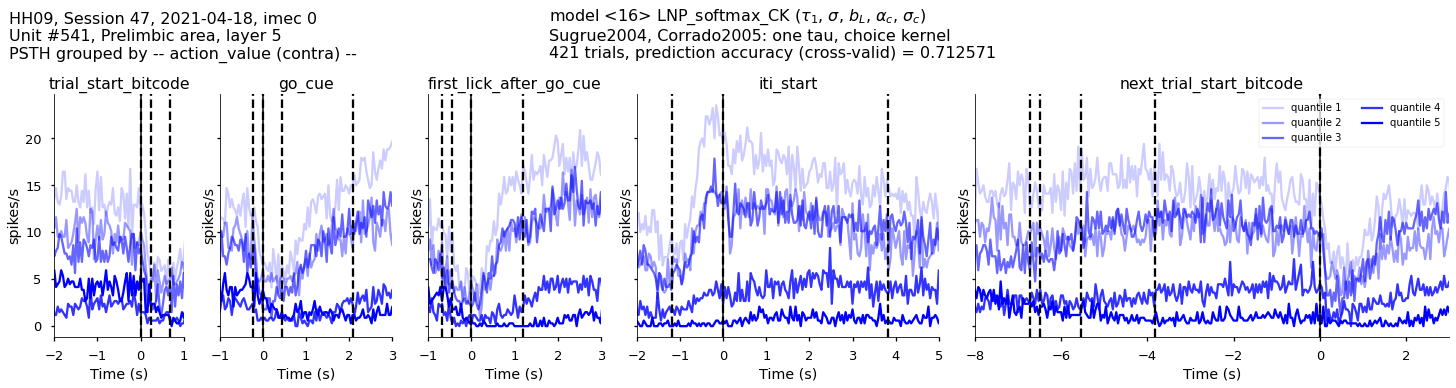

In [8]:
align_types=['trial_start', 'go_cue', 'first_lick_after_go_cue', 'iti_start', 'next_trial_start']
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=1, align_types=align_types)

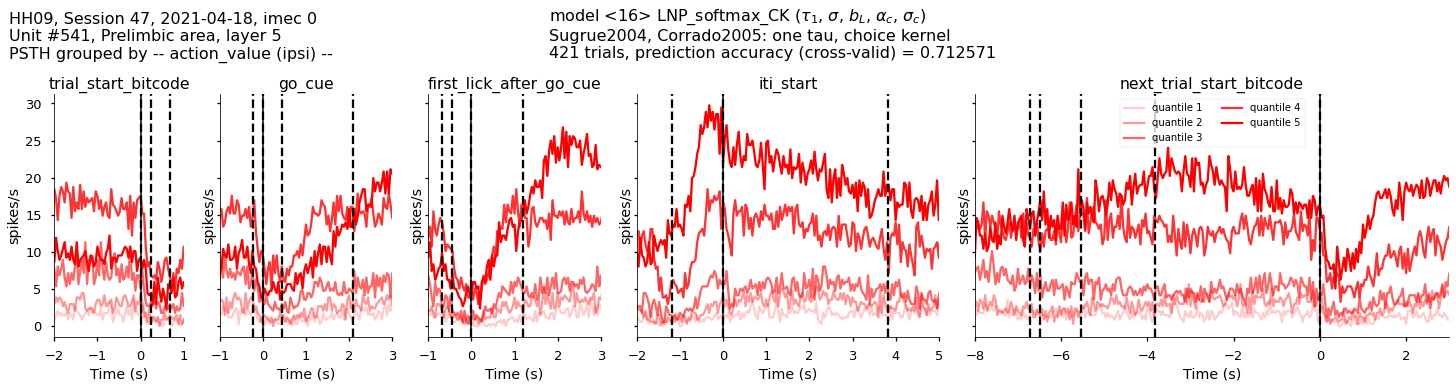

In [9]:
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=1, align_types=align_types, side='ipsi')

In [ ]:
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10, align_types=align_types, side='ipsi')

In [ ]:
align_types=['trial_start', 'go_cue', 'first_lick_after_go_cue', 'iti_start', 'next_trial_start']
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10, align_types=align_types, side='ipsi', latent_variable='choice_prob')

In [ ]:
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=21, align_types=align_types)

In [ ]:
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=21, align_types=align_types, latent_variable='choice_prob', side='ipsi')

In [ ]:
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=1)

### More example neurons

####  PL

In [ ]:
date, imec, unit = '2021-04-18', 0, 541
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=5)

In [ ]:
date, imec, unit = '2021-04-18', 0, 484
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10, latent_variable='choice_prob')

#### ALM

In [ ]:
date, imec, unit = '2021-04-29', 0, 501
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

In [ ]:
date, imec, unit = '2021-04-16', 0, 978
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

In [ ]:
date, imec, unit = '2021-04-29', 1, 362
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10, side='ipsi')

#### Thalamus

In [ ]:
date, imec, unit = '2021-06-11', 1, 75
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

In [ ]:
date, imec, unit = '2021-06-11', 1, 310
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

#### Striatum

In [ ]:
date, imec, unit = '2021-04-29', 0, 113
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10, side='ipsi')

####  Midbrain

These two should be in VTA

In [ ]:
date, imec, unit = '2021-06-14', 0, 22
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

In [ ]:
date, imec, unit = '2021-06-14', 0, 32
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

#### Ventral Pallidum

In [ ]:
date, imec, unit = '2021-06-09', 1, 175
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

In [ ]:
date, imec, unit = '2021-06-09', 1, 125
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

#### RSC

In [ ]:
date, imec, unit = '2021-06-12', 0, 168
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

#### OFC

In [ ]:
date, imec, unit = '2021-04-29', 0, 299
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

# Unit selectivity 

## Preparation